## K. Sarin Final Project: Data Science Programme — Cambridge University & Flatiron School
**Dataset:** Airline Passenger Satisfaction was downloaded from Kaggle datasets: [Airline Passenger satisfaction](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction). 

The dataset contains customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as their evaluation of different factors like cleanliness, comfort, service, and overall experience


<u>**Ambitions of this data exercise are to develop analysis on two topics:**</u><br>

1. Analyse trends on flight usage
- *What age groups typically take shorter / longer haul flights?*
- *What patterns emerge when looking at the gender / age distribution of different flight types, distances?*

2. From an airlines perspective, understand the key factors that drive satisfaction:
- *What is the overall experience scores by different customer types (age, gender)?*
- *Amongst different cabin classes, how do scores differentiate?*
- *What are the key factors that drive dissatisfaction, and therefore where do airlines need to focus their attention?*

### Importing packages and data set

In [230]:
# import all packages to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

conn = sqlite3.connect('airline_passenger_satisfaction.csv')

In [141]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [142]:
# Check type
type(df)

pandas.core.frame.DataFrame

In [143]:
# Check top 5
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [144]:
# Check bottom 5
df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [73]:
# Check shape
df.shape

(129880, 24)

In [74]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### Data cleansing checks

In [75]:
# Check columns
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [76]:
df.duplicated().value_counts()

False    129880
dtype: int64

Our descriptions are showing that there are:
- No issues with the column names
- No duplicates
- Missing data only in "Arrival Delay" column (393 rows). "Departure Delay" is a complete set, and this is likely to be included within "Arrival Delay". Hence we will use .corr function to check whether we can have confidence in "Departure Delay" and drop "Arrival Delay" column

In [77]:
print(df['Departure Delay'].corr(df['Arrival Delay']))

0.9652911835463203


In [12]:
#Strong correlation validates hypothesis
#Check dropping 'Arrival Delay' column
df.drop('Arrival Delay', axis=1)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [13]:
#Dropping 'Arrival Delay' column in a new df1
df1 = df.drop('Arrival Delay', axis=1)

In [78]:
#Check df1 for deleted 'Arrival Delay'
df1.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [79]:
df1['Age'].value_counts()

39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64

### Statistical and visual analysis to understand data better

In [80]:
df1.describe()

,ID,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can see the following interesting summary points from our dataset:
- Average age in the survey at 39 year old, with minimum of 7 and max of 85. Thereby indicating a solid range of data across the set
- Our average flight distance is slightly above a short-haul (defined as below 600-800 miles) but well below a long-haul (above 2,200-2,600 miles)
- Among all rating categories, 'In-flight Wifi Service' has the lowest average rating, while 'In-flight Service' has the highest average rating

### Visualising this further:

In [277]:
#The gender divide in our dataset, fairly balanced, slight skew towards female
sns.set_context('notebook')
sns.countplot(x="Gender", data=df1)
plt.gcf().set_size_inches(5, 5)/

SyntaxError: invalid syntax (<ipython-input-277-6633e4eb3cec>, line 4)

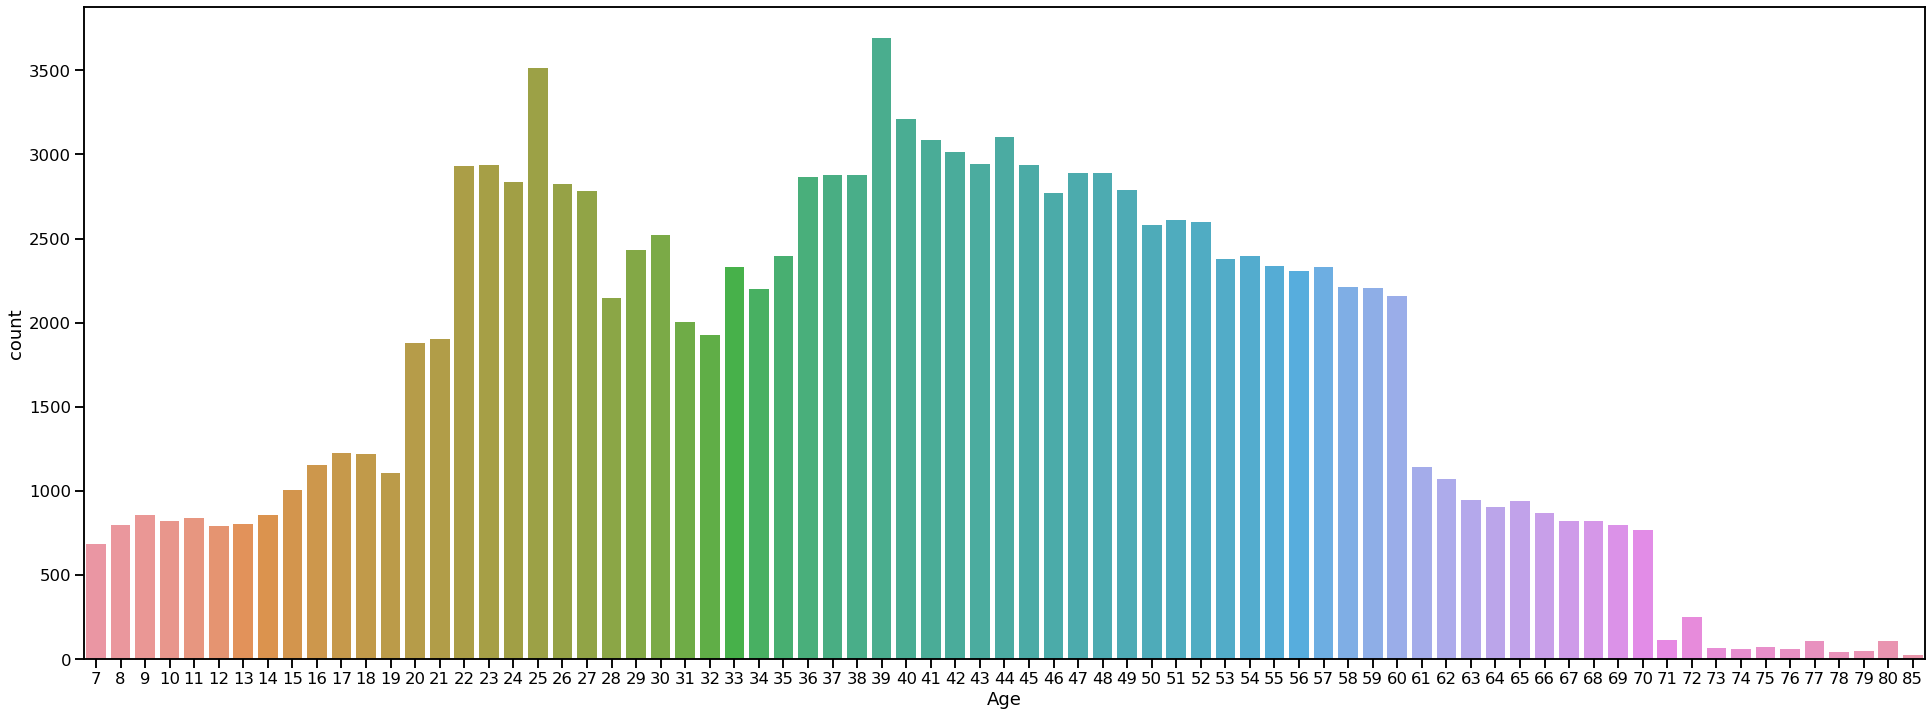

In [146]:
#The spread of ages in our dataset
sns.set_context('talk')
sns.countplot(x="Age", data=df1)
plt.gcf().set_size_inches(33, 12)

### Analysing trends on flight usage

Lets analyse trends on flight usage in terms of: 'Type of Travel', 'Class' and 'Flight Distance', by focusing our dataset on the following demographics (ignoring 'Child' i.e. <18 year olds for further analysis as travel assumed to rely on other age groups):

- Child: <18

- Youth: 18-24
- Young Adult: 25-34
- Adult: 35-44
- Mid life: 45-53
- Older Adult: 55-64 
- Senior: 65+

In [271]:
#create column with different age groups and add to df1
conditions = [
    (df1['Age'] <= 17.5),
    (df1['Age'] > 17.5) & (df['Age'] <= 24.5),
    (df1['Age'] > 24.5) & (df['Age'] <= 34.5),
    (df1['Age'] > 34.5) & (df['Age'] <= 44.5),
    (df1['Age'] > 44.5) & (df['Age'] <= 54.5),
    (df1['Age'] > 54.5) & (df['Age'] <= 64.5),
    (df1['Age'] > 64.5)
    ]

values = ['Child', 'Youth', 'Young_Adult', 'Adult', 'Mid-Life', 'Older Adult', 'Senior']

df1['Age Groups'] = np.select(conditions, values)

df1.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Age Groups
0,1,Male,48,First-time,Business,Business,821,2,3,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,Mid-Life
1,2,Female,35,Returning,Business,Business,821,26,2,2,...,4,5,5,3,5,2,5,5,Satisfied,Adult
2,3,Male,41,Returning,Business,Business,853,0,4,4,...,5,3,5,5,3,4,3,3,Satisfied,Adult
3,4,Male,50,Returning,Business,Business,1905,0,2,2,...,5,5,4,4,5,2,5,5,Satisfied,Mid-Life
4,5,Female,49,Returning,Business,Business,3470,0,3,3,...,4,4,5,4,3,3,3,3,Satisfied,Mid-Life


In [205]:
#create pandas sub dataframes by age groups for detailed analysis
Youth_df = df1[(df.Age >= 17.5) & (df.Age <= 24.5)]
Young_Adult_df = df1[(df.Age >= 24.5) & (df.Age < 34.5)]
Adult_df = df1[(df.Age >= 34.5) & (df.Age <= 44.5)]
Mid_Life_df = df1[(df.Age >= 44.5) & (df.Age <= 54.5)]
Older_Adult_df = df1[(df.Age >= 54.5) & (df.Age <= 64.5)]
Senior_df = df1[df.Age >= 64.5]

Youth_df['Age'].mean() #Doing a simple check on 'Youth' to see that it has worked - mean is within the age group desired

21.644076949038137

Let us analyse how the 'Class' people travel in varies through different stages of life

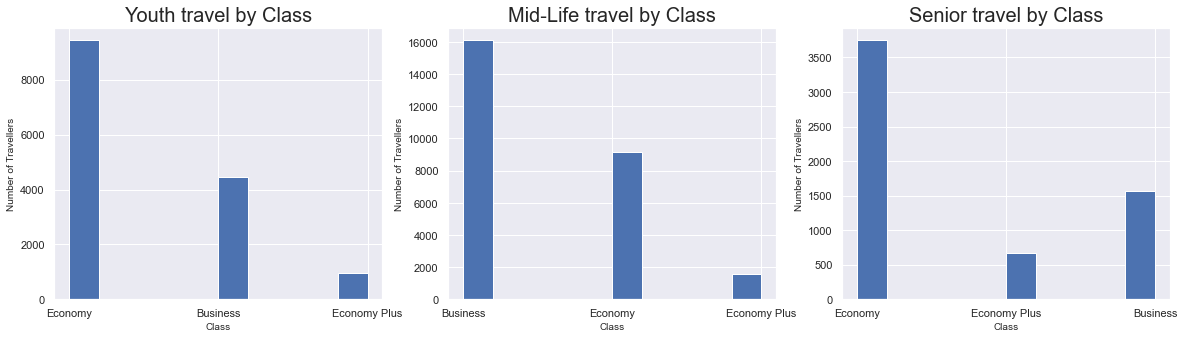

In [285]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))

ax_1 = axes[0]
Youth_df['Class'].hist(ax=ax_1)
ax_1.set_title('Youth travel by Class', fontsize = 20)
ax_1.set_xlabel('Class', fontsize = 10)
ax_1.set_ylabel('Number of Travellers' , fontsize = 10)

ax_2 = axes[1]
Mid_Life_df['Class'].hist(ax=ax_2)
ax_2.set_title('Mid-Life travel by Class', fontsize = 20)
ax_2.set_xlabel('Class', fontsize = 10)
ax_2.set_ylabel('Number of Travellers' , fontsize = 10)

ax_3 = axes[2]
Senior_df['Class'].hist(ax=ax_3)
ax_3.set_title('Senior travel by Class', fontsize = 20)
ax_3.set_xlabel('Class', fontsize = 10)
ax_3.set_ylabel('Number of Travellers' , fontsize = 10);


This shows us that Economy is the primary 'Class' of choice at either end of life, at younger ages and post retirement. This is not unexpected given monetary squeezes at these periods. During mid-life, when people are likely to be most settled, 'Business' is far more chosen than at other life periods

**Let us now analyse how the 'Flight Distance' travelled varies through different life stages**

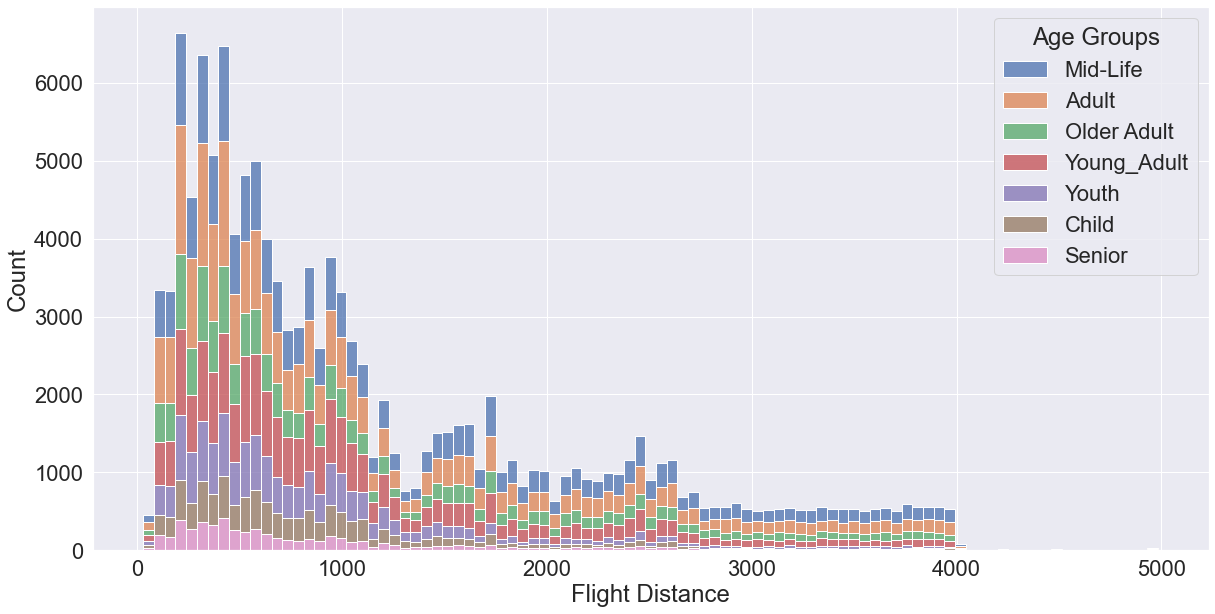

In [258]:
sns.histplot(data=df1, x="Flight Distance", hue="Age Groups", multiple="stack")
sns.set(rc = {'figure.figsize':(20,10)})
sns.set(font_scale=1)

We can see that short-haul flights are dominant and interesting trends emerge in the age groups:
- Youth and Child are heavily focused in the short-haul territory, as we move to longer distances very few of these demographics travel
- Seniors similarly travel mostly in the short-haul territory and do not engage very much in the longer-haul
- Mid-life and Adult are the dominant travel demographics, and they represent a higher proportion of longer-haul flight passengers

We can cross check these findings to statistical analysis, looking at the median distances travelled by different demographics:

In [278]:
df1.groupby('Age Groups')['Flight Distance'].median()

Age Groups
Adult          860.5
Child          723.0
Mid-Life       992.0
Older Adult    872.0
Senior         621.0
Young_Adult    859.0
Youth          689.0
Name: Flight Distance, dtype: float64

The table above corroborates our bar chart graph, as 'Child' 'Youth' and 'Senior' have significantly lower mid-point travel distances than other demographics. 'Mid-Life' passengers travel on average the furthest at 992 miles vs 'Senior' at lowest of 621 miles

Taking both analyses together we can see the following for different demographics:

**Youth**
- Fly shorter-haul flights generally (689 miles median) 
- Usually travel in Economy class

**Adults**
- Significant range among different age sub-groups and life stage
- Average flight distances rise with age from 859 miles at Young-Adult to 992 miles for Mid-Life
- As distances rise, the class choices also rise, with Mid-Life choosing Business more frequently

**Older**
- Flight distances fall as begin to reach 'Older Adult' and 'Senior' falling to the lowest distances among all demographics of 621 miles median
- As distances fall, these demographics switch back towards Economy as the primary class

### Analysing the key factors that drive (dis)satisfaction among customers

Overall let's look at how satisfaction vs neutral or dissatisfaction ratings varied across different demographics

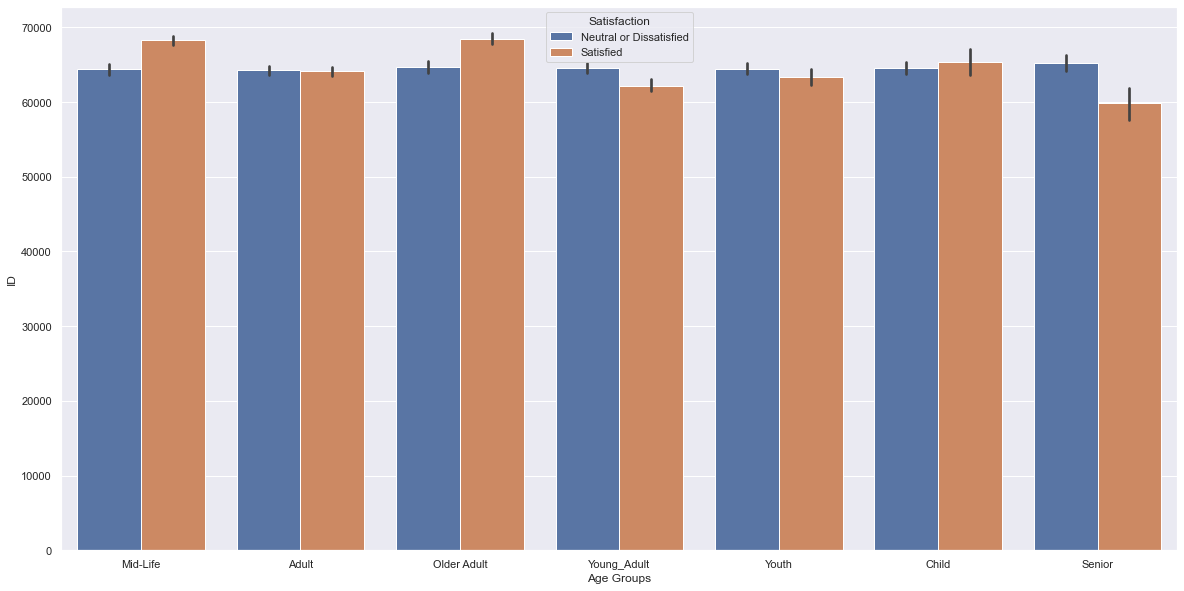

In [327]:
ax = sns.barplot(x="Age Groups", y="ID", hue="Satisfaction", data=df1)
plt.show()

We can see that neutral or dissatisfaction ratings are broadly equally rated in total numbers of customers across different demographics. When looking within individual demographics:

- Mid-Life adults and older adults are generally more satisfied than dissatisfied
- At either end of the demographics, Youth-Young Adult and Senior, there are notably more neutral or dissatisfied ratings, with a significant gap particularly for Senior population

Let's compare the statistics of customers that rated "Neutral or Dissatisfied" to those that voted Satisfied to understand the main drivers better

In [298]:
Dis_df = df1[df1['Satisfaction'] == 'Neutral or Dissatisfied']

Dis_df.describe()

,ID,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000,73452.000000
mean,64507.311428,37.650997,929.715420,16.406837,3.130221,2.549393,3.042967,2.658621,2.980055,3.019537,3.037998,2.990443,2.932800,2.958422,3.389601,2.398423,2.892433,3.374912
std,37554.513773,16.465802,791.293326,40.182914,1.500602,1.209112,1.282169,1.147048,1.199730,1.283096,1.304040,1.304366,1.326273,1.347681,1.176514,0.964250,1.324212,1.175043
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,31813.250000,25.000000,372.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64081.500000,37.000000,674.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,4.000000
75%,97173.250000,50.000000,1149.000000,15.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,129880.000000,85.000000,4983.000000,1592.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [299]:
Sat_df = df1[df1['Satisfaction'] == 'Satisfied']

Sat_df.describe()

,ID,Age,Flight Distance,Departure Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,56428.000000,56428.000000,56428.000000,56428.000000,56428.000000,56428.000000,56428.000000,56428.000000,56428.00000,56428.000000,56428.000000,56428.000000,56428.000000,56428.000000,56428.000000,56428.000000,56428.000000,56428.000000
mean,65504.379049,41.741015,1529.539165,12.509782,2.963068,3.026955,3.649004,4.025856,2.97285,3.856171,3.966417,3.820054,3.746509,3.525448,3.970990,3.158609,3.964202,3.966914
std,37406.219134,12.797669,1127.596799,35.010480,1.555052,1.578157,1.158670,1.195609,1.37433,1.128800,1.142429,1.176374,1.143706,1.234932,1.092652,1.590710,1.078943,1.099795
min,2.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,33200.500000,32.000000,525.000000,0.000000,2.000000,2.000000,3.000000,4.000000,2.00000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000
50%,65948.000000,43.000000,1249.000000,0.000000,3.000000,3.000000,4.000000,4.000000,3.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,97757.750000,51.000000,2407.000000,9.000000,4.000000,4.000000,5.000000,5.000000,4.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,129879.000000,85.000000,4983.000000,1305.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In-flight Wifi Service:
- Dissatisfied customers: This is the lowest average score of all factors at 2.397, indicating it is a key reason driving dissatisfaction. Additionally, it has the lowest standard deviation of all factors at 0.964, with the lowest spread in answers and closest to the mean. Among all the answers, giving a low score for in-flight wifi services was the most prevalant factor
- Satisfied customers: Contrastingly, in-flight wifi had the highest standard deviation, indicating a higher spread in answers, and therefore more contention even among satisfied customers

Let's try to understand more about our dissatisfied customer base, understanding what class they have sat in, and how they scored in-flight Wifi services:

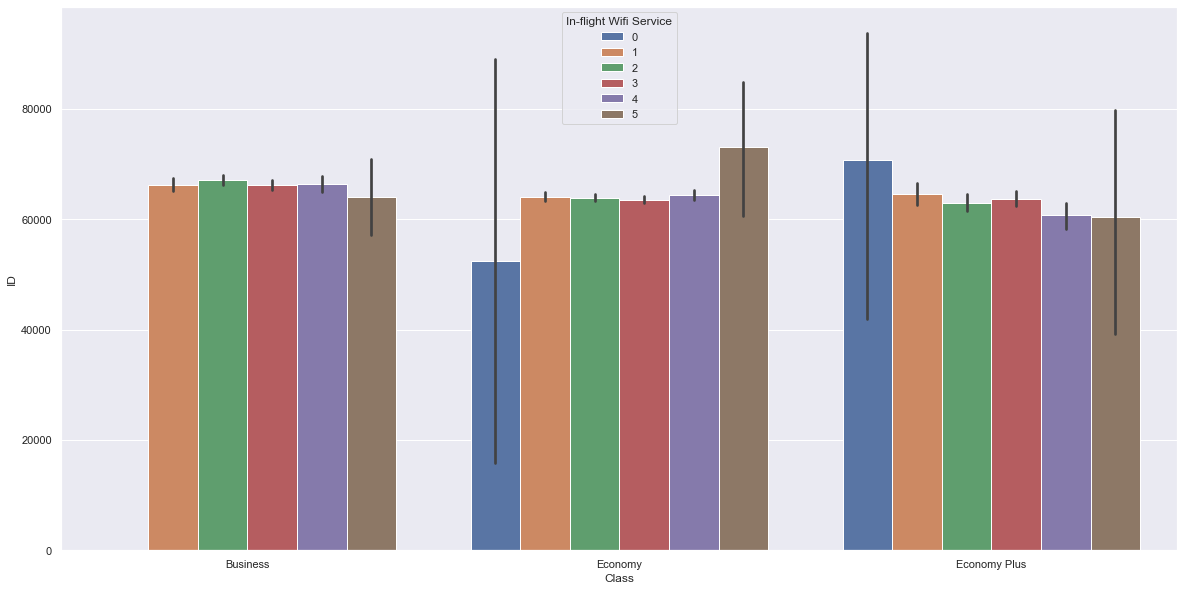

In [317]:
ax = sns.barplot(x="Class", y="ID", hue="In-flight Wifi Service", data=Dis_df)
plt.show()

What is particularly interesting from the chart above is how dominant 'Economy Plus' is within the dissatisfied customer base. 'Economy Plus' represents a relatively small proportion of the overall survey (refer back to travel by class bar charts across demographics), however it represents a significant proportion of the dissatisfied customer base. 

Additionally Wifi services was broadly equally weighted for 'Business', indexed towards higher ratings for 'Economy' and notably low rated for 'Economy Plus'

This suggests that airline companies should dedicate more time to ensuring 'Economy Plus' is notably distinctive, with additional effort towards Wifi service enablement. 

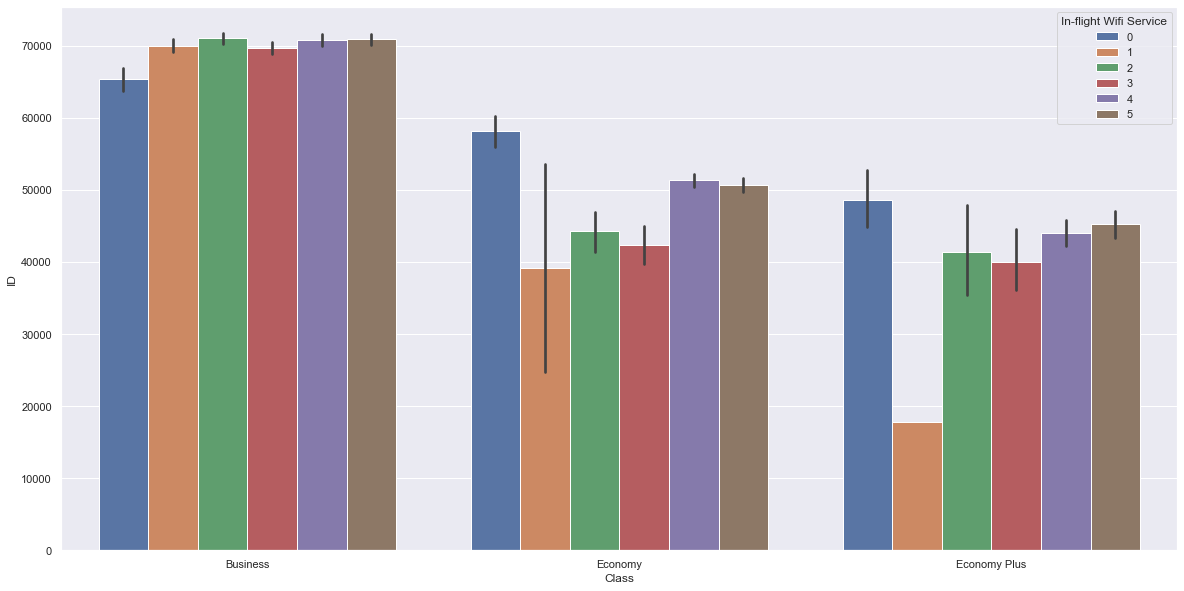

In [319]:
ax = sns.barplot(x="Class", y="ID", hue="In-flight Wifi Service", data=Sat_df)
plt.show()

Within our satisfied customer base, 'Business' is the dominant class as expected, with wifi services generally rated equally. Interestingly for 'Economy' and 'Economy Plus' particularly, the proportion of passengers rating in-flight wifi services as lowest satisfaction (1) is significantly lower than other ratings. This indicates that strong in-flight wifi services is a key driver for passengers returning an overall satisfied rating. As such it validates the point that airlines should focus attention towards improving and maintaining this.